# Урок 3. Построение модели классификации.

Ответ Цымбал Людмилы

### 1. Для чего и в каких случаях полезны различные варианты усреднения для метрик качества классификации: micro, macro, weighted?

**average=micro** вычисляет точность, полноту, f1 или AUC учитывая общее количество TP, FP, FN, TN срабатываний (независимо от прогноза для каждой метки в наборе данных) т.е. усредняем TP, FP, FN, TN, а затем находим точность, полноту, f1 или AUC

**average=macro** вычисляет точность, полноту, f1 или AUC для каждой метки, и возвращается среднее значение без учета пропорции для каждой метки в наборе данных

**average=weighted** (cреднее взвешенное) вычисляет точность, полноту, f1 или AUC для каждой метки и возвращает среднее значение с учетом пропорции для каждой метки в наборе данных.

**micro**  Вклад каждого класса зависит от его размера, он работает в целом и не чувствителен к прогностическим показателям отдельных классов (плохо работает при несбалансированных классах)

**macro** Все классы вносят равный вклад, без учета их размера

**weighted** Вклад равен количеству данных каждого класса в наборе

### 2. В чём разница между моделями xgboost, lightgbm и catboost или какие их основные особенности?

**Xgboost** для выбора разбиения используют сортировку и модели, основанные на анализе гистограмм. XGboost не использует никаких взвешенных методов отбора проб, что делает процесс расщепления медленнее по сравнению с LightGBM и CatBoost. Он распадается до указанного max_depth, а затем начинает обрезку дерева назад и удаляет расколы, за которыми нет положительной выгоды.

**LightGBM** (от Microsoft) для выбора критерия разбиения используется Gradient-based One-Side Sampling (GOSS), который выбирает разделение, используя все экземпляры с большими градиентами (т.е. большой ошибкой) и случайную выборку экземпляров с небольшими градиентами. Для того, чтобы сохранить тот же распределение данных при вычислении получения информации, GOSS вводит постоянный множитель для экземпляров данных с небольшими градиентами. Таким образом, GOSS достигает хорошего баланса между увеличением скорости за счет сокращения числа экземпляров данных и сохранения точности для изученных деревьев решений. Этот метод не является методом по умолчанию для LightGBM, поэтому он должен быть выбран явно. Имеются методы работы с категориальными признаками. Важно контролировать глубину дерева

**CatBoost** (от Яндекс) реализует особый подход к обработке категориальных признаков (основанный на target encoding, т.е. на подмене категориальных признаков статистиками на основе предсказываемого значения) и содержит особый подход к построению дерева, выращивает сбалансированное дерево. На каждом уровне такого дерева выбирается пара, разделенная функциями, которая приводит к наименьшей потере (в соответствии с функцией штрафа) и используется для всех узлов уровня. Изменить его политику можно с помощью параметра  grow-policy.

In [6]:
from IPython.display import Image

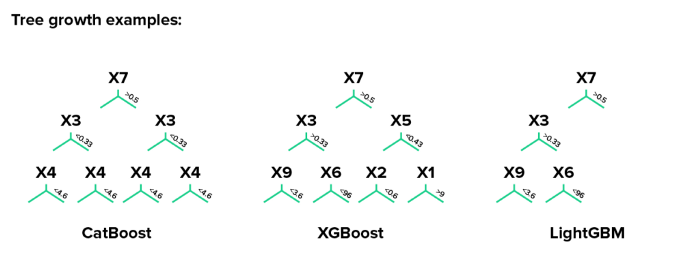

In [7]:
Image(filename=r'C:\Users\Мила\Desktop\Downloads\1_E006sjlIjabDJ3jNixRSnA.png')